**Memasukan API Kaggle**

In [ ]:
pip install kaggle

In [ ]:
mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d prakharrathi25/banking-dataset-marketing-targets
!unzip -o banking-dataset-marketing-targets.zip

Dataset URL: https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets
License(s): CC0-1.0
banking-dataset-marketing-targets.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  banking-dataset-marketing-targets.zip
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import zipfile

In [ ]:
zip_ref = zipfile.ZipFile('/content/banking-dataset-marketing-targets.zip','r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
import pandas as pd
import numpy as np

**Memilah Data**

In [ ]:
df = pd.read_csv('/content/test.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
df = pd.read_csv('/content/train.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


**Identifikasi Tipe Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()

<Axes: xlabel='y', ylabel='count'>

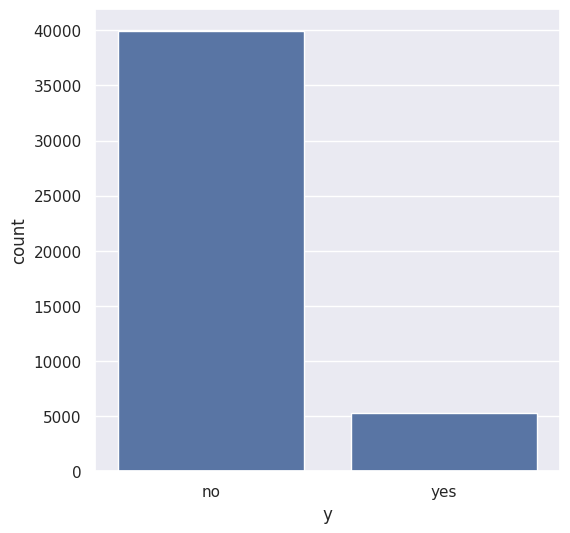

In [ ]:
# Mengecek class yang terdapat dalam dataset bank marketing
sns.countplot(x='y', data=df)

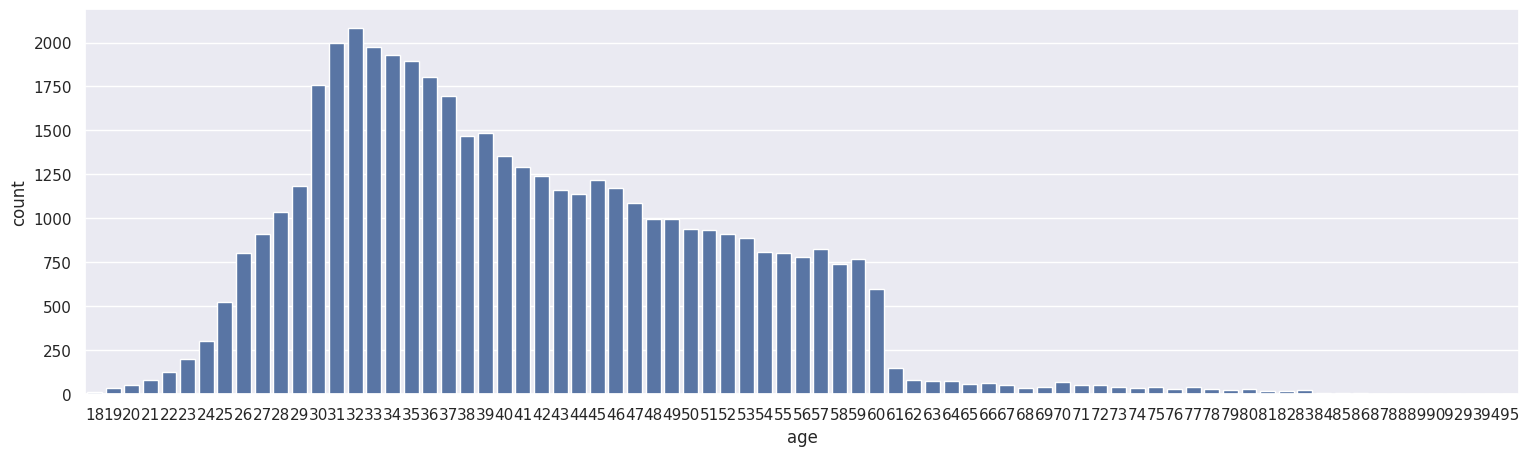

In [ ]:
# Nasabah dengan atribut usia mendominasi pada dataset bank marketing
ad = sns.countplot(x='age', data=df)
ad.figure.set_size_inches(18.5, 5)

In [ ]:
# Bar drawing function
def bar_chart(feature):
    yes = df[df['y'] == 'yes'][feature].value_counts()
    no = df[df['y'] == 'no'][feature].value_counts()
    df_bar = pd.DataFrame([yes, no])
    df_bar.index = ['yes', 'no']
    df_bar.plot(kind='bar', stacked=True, figsize=(8,5))

Text(0.5, 1.0, 'Hubungan Status Pernikahan dengan Deposito')

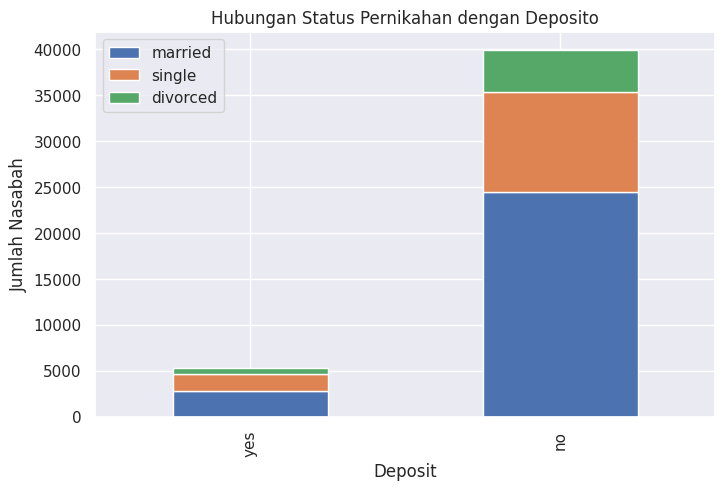

In [ ]:
#Marriage and group
import matplotlib.pyplot as plt
bar_chart('marital')
plt.xlabel('Deposit')
plt.ylabel('Jumlah Nasabah')
plt.legend()
plt.title('Hubungan Status Pernikahan dengan Deposito')

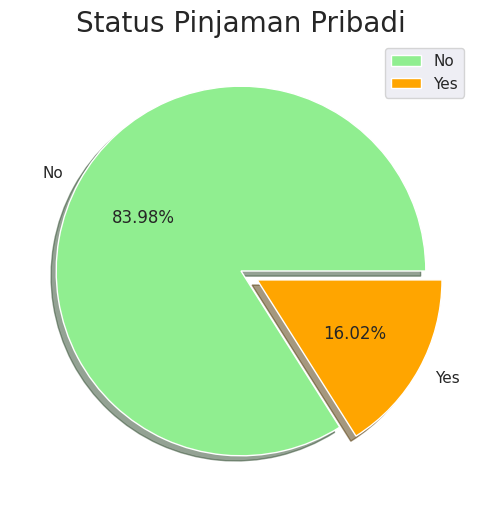

In [ ]:
labels = ['No', 'Yes']
size = df['loan'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (6, 6)
plt.pie(size, colors=colors, explode=explode, labels=labels, shadow=True, autopct='%.2f%%')
plt.title('Status Pinjaman Pribadi', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

**Data Cleansing**

In [ ]:
df.isnull()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().value_counts()

,,,,,,,,,,,,,,,,,count
age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,
False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,45211


In [ ]:
sum(df.duplicated())

0

**Konstruksi Data**

In [ ]:
Y = df['y'].values  # Target for the model
X = df[['age','job','marital','education','default','balance','housing','loan',
        'contact','day','month','duration','campaign','pdays','previous','poutcome']]  # Features we use

print("Feature: ", X.shape)  # matrix
print("Response: ", Y.shape)  # series

Feature:  (45211, 16)
Response:  (45211,)


In [ ]:
# convert categorical columns to integers
category_cols = ['job','marital','default','housing','loan','education','contact','month','poutcome']
for header in category_cols:
    X[header] = X[header].astype('category').cat.codes
    #X_test[header] = X_test[header].astype('category').cat.codes

<ipython-input-73-3296221482>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[header] = X[header].astype('category').cat.codes
<ipython-input-73-3296221482>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[header] = X[header].astype('category').cat.codes
<ipython-input-73-3296221482>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [ ]:
print(X.dtypes)

age          int64
job           int8
marital       int8
education     int8
default       int8
balance      int64
housing       int8
loan          int8
contact       int8
day          int64
month         int8
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome      int8
dtype: object


In [ ]:
# Label encoder
from sklearn.preprocessing import LabelEncoder

y_encoder = LabelEncoder()
df = df.copy()
df.y = y_encoder.fit_transform(df.y)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Boxplot of campaign')

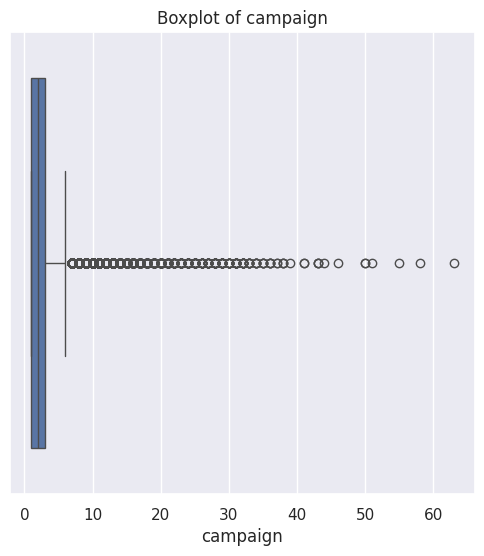

In [ ]:
sns.boxplot(data=df,x=df["campaign"])
plt.title("Boxplot of campaign")

In [ ]:
def outliers(df, feature):
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    upper_lmt = q3 + 1.5 * iqr
    lower_lmt = q1 - 1.5 * iqr
    return upper_lmt, lower_lmt

upper_lmt, lower_lmt = outliers(df, "campaign")
print("Upper Limit: ", upper_lmt)
print("Lower Limit: ", lower_lmt)

Upper Limit:  6.0
Lower Limit:  -2.0


In [ ]:
df[(df['campaign'] < lower_lmt) | (df['campaign'] > upper_lmt)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,z_score
758,59,services,married,secondary,no,307,yes,yes,unknown,6,may,250,7,-1,0,unknown,0,1.367376
780,30,admin.,married,secondary,no,4,no,no,unknown,7,may,172,8,-1,0,unknown,0,1.690163
906,27,services,single,secondary,no,0,yes,no,unknown,7,may,388,7,-1,0,unknown,0,1.367376
1103,52,technician,married,unknown,no,133,yes,no,unknown,7,may,253,8,-1,0,unknown,0,1.690163
1105,43,admin.,married,tertiary,no,1924,yes,no,unknown,7,may,244,7,-1,0,unknown,0,1.367376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44666,25,technician,single,secondary,no,1298,no,no,cellular,2,sep,206,7,94,2,other,0,1.367376
44680,27,self-employed,single,tertiary,no,560,no,no,telephone,3,sep,543,9,465,2,failure,0,2.012949
44770,37,services,single,tertiary,no,1189,no,no,cellular,13,sep,323,9,199,4,other,1,2.012949
44886,38,management,married,tertiary,no,0,no,no,cellular,24,sep,246,12,197,6,failure,0,2.981310


In [ ]:
new_df = df[(df['campaign'] > lower_lmt) & (df['campaign'] < upper_lmt)]

Text(0.5, 1.0, 'Boxplot of campaign')

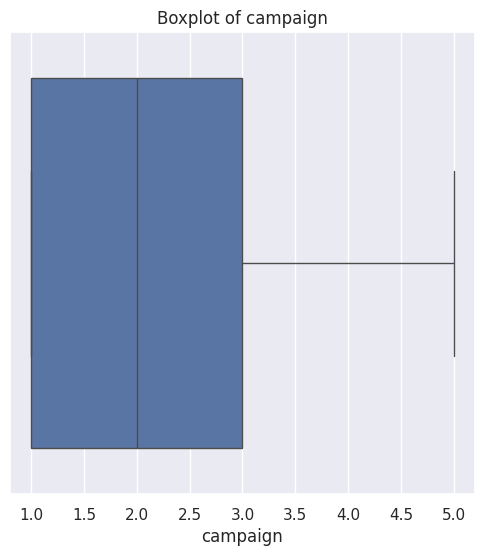

In [ ]:
sns.boxplot(data=new_df,x=new_df["campaign"])
plt.title("Boxplot of campaign")

In [ ]:
from scipy import stats

In [ ]:
df['z_score'] = (df['campaign'] - df['campaign'].mean()) / df['campaign'].std()
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,z_score
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,-0.569344
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,-0.569344
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,-0.569344
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0,-0.569344
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0,-0.569344


In [ ]:
new_df2 = df[(df['z_score'] < 3) & (df['z_score'] > -3)]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
model = scaler.fit(X)
scale_data = model.transform(X)
print(scale_data)

[[0.51948052 0.36363636 0.5        ... 0.         0.         1.        ]
 [0.33766234 0.81818182 1.         ... 0.         0.         1.        ]
 [0.19480519 0.18181818 0.5        ... 0.         0.         1.        ]
 ...
 [0.7012987  0.45454545 0.5        ... 0.21215596 0.01090909 0.66666667]
 [0.50649351 0.09090909 0.5        ... 0.         0.         1.        ]
 [0.24675325 0.18181818 0.5        ... 0.21674312 0.04       0.33333333]]


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)

[[ 1.60696496 -0.10381968 -0.27576178 ... -0.41145311 -0.25194037
   0.44489814]
 [ 0.28852927  1.42400783  1.3683719  ... -0.41145311 -0.25194037
   0.44489814]
 [-0.74738448 -0.71495069 -0.27576178 ... -0.41145311 -0.25194037
   0.44489814]
 ...
 [ 2.92540065  0.20174582 -0.27576178 ...  1.43618859  1.05047333
  -0.56617504]
 [ 1.51279098 -1.02051619 -0.27576178 ... -0.41145311 -0.25194037
   0.44489814]
 [-0.37068857 -0.71495069 -0.27576178 ...  1.4761376   4.52357654
  -1.57724822]]
